In [1]:
import pandas as pd
import datetime as dt

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sklearn.linear_model as sk

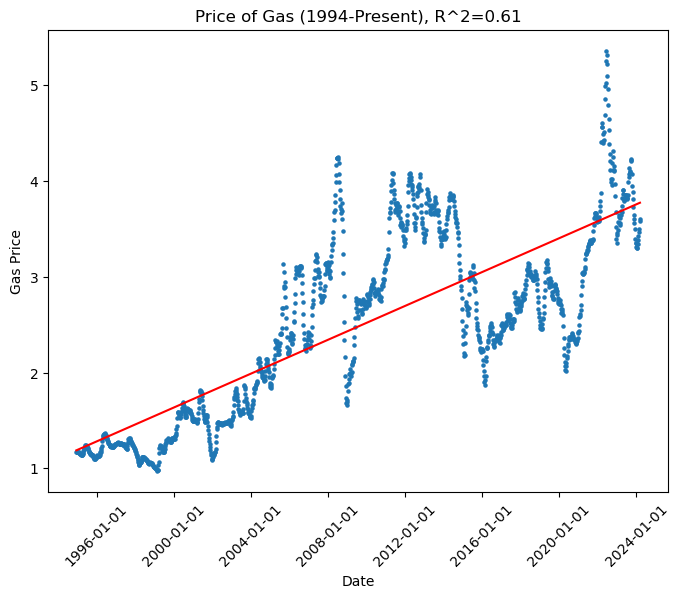

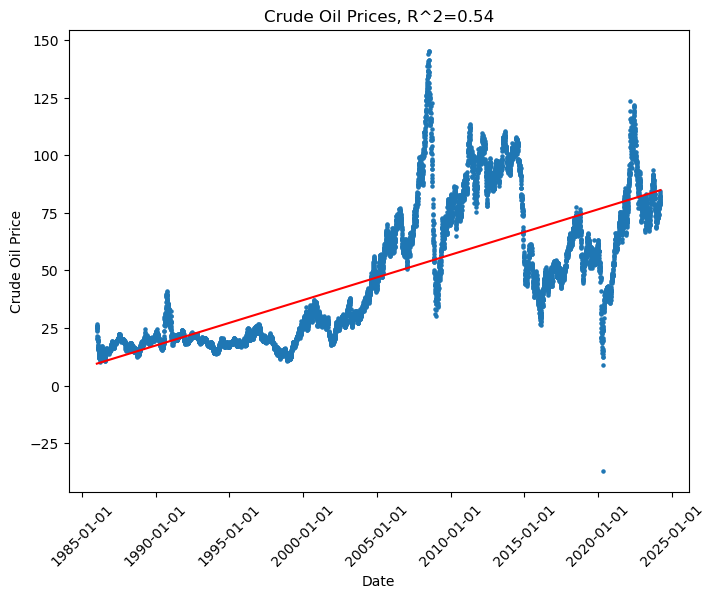

In [2]:
# Read the first CSV file
df1 = pd.read_csv('/Users/juan_montelongo/Downloads/SPRING 2024/MATH 150/Project/pswrgvwall.csv', skiprows=4)

# Extracting columns from the first CSV
x = df1.iloc[:-1, 0].tolist()  # Assuming you want all rows except the last one from column 0
x2 = df1.iloc[:-1, 1].tolist()  # Assuming you want all rows except the last one from column 1

# Read the second CSV file
df2 = pd.read_csv('/Users/juan_montelongo/Downloads/SPRING 2024/MATH 150/Project/Crude_Oil_Prices_Data1_Table1.csv', skiprows=4)

# Extracting columns from the second CSV
xdates = df2.iloc[:, 0].tolist()  # Assuming you want all rows from column 0
xBarPr = df2.iloc[:, 1].tolist()  # Assuming you want all rows from column 1

dates = [dt.datetime.strptime(date, '%b %d, %Y') for date in x]
datesforCr = [dt.datetime.strptime(date, '%b %d, %Y') for date in xdates]

datesforR2 = [dt.datetime.strptime(date, '%b %d, %Y').timestamp() for date in x]
x2int = [float(i) for i in x2]  # gas prices
x2Cr = [float(i) for i in xBarPr]  # crude oil barrel prices

# Convert dates to timestamps
datesforCr = [date.timestamp() for date in datesforCr]

# Reshape the arrays
datesforR2 = np.array(datesforR2).reshape(-1, 1)
x2int = np.array(x2int).reshape(-1, 1)
x2Cr = np.array(x2Cr).reshape(-1, 1)
datesforCr = np.array(datesforCr).reshape(-1, 1)

# Run linear regression for Gas Prices
model_gas = sk.LinearRegression().fit(datesforR2, x2int)
ypred_gas = model_gas.predict(datesforR2)
rsqu_gas = model_gas.score(datesforR2, x2int)

# Run linear regression for Crude Oil Prices
model_crude = sk.LinearRegression().fit(datesforCr, x2Cr)
ypred_crude = model_crude.predict(datesforCr)
rsqu_crude = model_crude.score(datesforCr, x2Cr)

# Plot Gas Prices
plt.figure(figsize=(8, 6))
plt.scatter([dt.datetime.fromtimestamp(ts[0]) for ts in datesforR2], x2int, s=[5])
plt.plot([dt.datetime.fromtimestamp(ts[0]) for ts in datesforR2], ypred_gas, color='red')
plt.title('Price of Gas (1994-Present), R^2=' + str(np.round(rsqu_gas, 2)))
plt.xlabel('Date')
plt.ylabel('Gas Price')

# Format the x-axis as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xticks(rotation=45)
plt.show()

# Plot Crude Oil Prices
plt.figure(figsize=(8, 6))
plt.scatter([dt.datetime.fromtimestamp(ts[0]) for ts in datesforCr], x2Cr, s=[5])
plt.plot([dt.datetime.fromtimestamp(ts[0]) for ts in datesforCr], ypred_crude, color='red')
plt.title('Crude Oil Prices, R^2=' + str(np.round(rsqu_crude, 2)))
plt.xlabel('Date')
plt.ylabel('Crude Oil Price')

# Format the x-axis as dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xticks(rotation=45)
plt.show()